In [1]:
import json
import os
import glob
import pprint
from tqdm import tqdm
from collections import Counter

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("datasets/verified.dat", 
                 names=["uid", "name", "friends", "friends_count", 
                        "followers_count", "listed_count", "statuses_count", 
                        "created_at", "url", "avatar", "location"])

In [3]:
# df = df[df['friends_count'] <= 1000]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335018 entries, 0 to 335017
Data columns (total 11 columns):
uid                335018 non-null int64
name               335017 non-null object
friends            335018 non-null object
friends_count      335018 non-null int64
followers_count    335018 non-null int64
listed_count       335018 non-null int64
statuses_count     335018 non-null int64
created_at         335018 non-null object
url                269170 non-null object
avatar             332540 non-null object
location           269760 non-null object
dtypes: int64(5), object(6)
memory usage: 28.1+ MB


In [4]:
df.head()

,uid,name,friends,friends_count,followers_count,listed_count,statuses_count,created_at,url,avatar,location
0,26642006,Alyssa_Milano,friends,4381,3638372,37370,59701,Thu Mar 26 00:34:20 +0000 2009,https://t.co/DOhhBYiEHZ,img/26642006.jpg,Los Angeles
1,46233559,rosemcgowan,friends,4661,890406,8280,13880,Wed Jun 10 21:39:32 +0000 2009,https://t.co/hinkEjQ5ex,img/46233559.jpg,Planet 9
2,44783853,HHSGov,friends,396,779017,8545,19885,Fri Jun 05 01:14:31 +0000 2009,https://t.co/T4j355Evo7,img/44783853.jpg,Washington D.C.
3,44409004,shakira,friends,210,51523187,99436,6301,Wed Jun 03 17:38:07 +0000 2009,https://t.co/lL3bUtNcA1,NaN,Barranquilla
4,62290422,RedHourBen,friends,625,5763578,28830,5484,Sun Aug 02 16:21:43 +0000 2009,NaN,img/62290422.jpg,Red Hour Films - Los Angeles


In [5]:
# df.info()

### Dict structure    
uid:{
    
    uid: 123,
    name: '',
    friends_count: 0,
    followers_count: 0,
    listed_count: 0,
    statuses_count: 0,
    pff: 0,
    pfr: 0,
    gcf: 0,
    gcr: 0,
    description: '',
    tweets: []

}

In [6]:
ids = list(df['uid'])


In [10]:
users = {}

# for i in ids:
    
#     users[i] = {
#         'uid': i,
#         'pff': 0,
#         'pfr': 0,
#         'gcf': 0,
#         'gcr': 0,
#         'description': '',
#         'tweets': []
#     }

In [9]:
# len(users)

335015

In [10]:
# user_dict = users

In [12]:
files_users = glob.iglob(f"../fakenewsnet_dataset/user_profiles/*.json")

count = 0


for file in files_users:
    if count%1000 == 0:
        print(count)
#     if count == 1:
#         break
    with open(file, encoding='utf-8', mode='r') as currentFile:
        data = json.load(currentFile)
#         print(data)
        
        if data['verified'] == False:
            users[data['id']] = {
                'uid': data['id'],
                'name': data['name'],
                'friends_count': data['friends_count'],
                'followers_count': data['followers_count'],
                'listed_count': data['listed_count'],
                'statuses_count': data['statuses_count'],
                'pff': 0,
                'pfr': 0,
                'gcf': 0,
                'gcr': 0,
                'description': data['description'],
                'tweets': []
            }
    
    count+=1
            

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000


In [13]:
len(users)

388134

In [14]:
list_of_lists = []

for user_id in users:
    name = users[user_id]['name']
    friends_count = users[user_id]['friends_count']
    followers_count = users[user_id]['followers_count']
    listed_count = users[user_id]['listed_count']
    statuses_count = users[user_id]['statuses_count']
    description = users[user_id]['description']
    
    
    list_of_lists.append([user_id, name, friends_count, followers_count, listed_count, statuses_count
                          , description])


In [15]:
df_users = pd.DataFrame(list_of_lists, columns=["uid", 'name','friends_count','followers_count'
                                                ,'listed_count', 'statuses_count', 'description'])

In [16]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388134 entries, 0 to 388133
Data columns (total 7 columns):
uid                388134 non-null int64
name               388134 non-null object
friends_count      388134 non-null int64
followers_count    388134 non-null int64
listed_count       388134 non-null int64
statuses_count     388134 non-null int64
description        388134 non-null object
dtypes: int64(5), object(2)
memory usage: 20.7+ MB


In [18]:
df_users.sort_values(['followers_count', 'friends_count'], ascending=False).head(10)

,uid,name,friends_count,followers_count,listed_count,statuses_count,description
6636,204832963,God,1,6037977,16876,10663,Unverified. Unverified. Thee/thou/thine. Heade...
302038,443580317,unsent,56,2422670,1543,82364,time to send it | unfiltered | i dont drink be...
373056,2425231,Fact,1,2158118,7809,652719,Interesting facts about life. Check out our mo...
22075,14116807,ShareThis,4318,2148099,4442,5628,ShareThis powers human connections by transfor...
118746,2507863381,Khawaja Saad Rafique,42,2012310,385,4750,Muslim Pakistani Democrat —politician/social w...
321040,69356087,Hadith of the Day,705,1983058,1424,27162,Reaching over 100 million people each month. P...
232215,27528339,Linda Ikeji,1069,1943897,1715,156397,"Blogger. CEO, LindaIkejiTV"
40627,9075022,RPP Noticias,949,1828232,4832,378021,Noticias del Perú y el mundo actualizadas desd...
57368,835083097,Puppy Lover,11923,1750967,1130,104963,Partnership or Pay for a share. email:poemporn...
323847,279390084,Anonymous,898,1541142,15920,173689,"We are Anonymous, we are legion, we do not for..."


In [19]:
df_users.to_csv('datasets/unverified_users_list.csv', index=False)

## PolitiFact

### Fake Tweets & Retweets

In [ ]:
files = glob.iglob(f"../fakenewsnet_dataset/politifact/fake/*/tweets/*.json")

count = 0

#143000

for file in files:
    if count%1000 == 0:
        print(count)
#     if count == 240000:
#         break
    with open(file, encoding='utf-8', mode='r') as currentFile:
        data = json.load(currentFile)
        tweet = data['text']
        des = data['user']['description']
        user_id = data['user']['id']
        
    
        if user_id in user_dict:
            user_dict[user_id]['pff']+=1
            user_dict[user_id]['description'] = des
            user_dict[user_id]['tweets'].append(tweet)
            
            
        
#         userList.append(data['user'])
    count +=1

In [ ]:
files_rt = glob.iglob(f"../fakenewsnet_dataset/politifact/fake/*/retweets/*.json")

count = 0


for file in files_rt:
    if count%1000 == 0:
        print(count)
#     if count == 240000:
#         break
    with open(file, encoding='utf-8', mode='r') as currentFile:
        data = json.load(currentFile)
        for d in data['retweets']:
            tweet = d['text']
            des = d['user']['description']
            user_id = d['user']['id']


            if user_id in user_dict:
                user_dict[user_id]['pff']+=1
                user_dict[user_id]['description'] = des
                user_dict[user_id]['tweets'].append(tweet)
                
    count +=1

In [13]:
# user_dict

### Real Tweets & Retweets

In [ ]:
files = glob.iglob(f"../fakenewsnet_dataset/politifact/real/*/tweets/*.json")

#362000

count = 0
for file in files:
    if count%1000 == 0:
        print(count)
    count +=1
#     if count < 240001:
#         continue
#     if count == 500000:
#         break
    with open(file, encoding='utf-8', mode='r') as currentFile:
        data = json.load(currentFile)
        tweet = data['text']
        des = data['user']['description']
        user_id = data['user']['id']
        
    
        if user_id in user_dict:
            user_dict[user_id]['pfr']+=1
            user_dict[user_id]['description'] = des
            user_dict[user_id]['tweets'].append(tweet)
            
            
        
#         userList.append(data['user'])


In [16]:
files_rt = glob.iglob(f"../fakenewsnet_dataset/politifact/real/*/retweets/*.json")

count = 0


for file in files_rt:
    if count%1000 == 0:
        print(count)
#     if count == 240000:
#         break
    with open(file, encoding='utf-8', mode='r') as currentFile:
        data = json.load(currentFile)
        for d in data['retweets']:
            tweet = d['text']
            des = d['user']['description']
            user_id = d['user']['id']


            if user_id in user_dict:
                user_dict[user_id]['pfr']+=1
                user_dict[user_id]['description'] = des
                user_dict[user_id]['tweets'].append(tweet)
                
    count +=1

## GossipCop

### Fake Tweets & Retweets

In [ ]:
files = glob.iglob(f"../fakenewsnet_dataset/gossipcop/fake/*/tweets/*.json")

count = 0
#524000

for file in files:
    if count%1000 == 0:
        print(count)
    count +=1
#     if count < 240001:
#         continue
#     if count == 500000:
#         break
    with open(file, encoding='utf-8', mode='r') as currentFile:
        data = json.load(currentFile)
        tweet = data['text']
        des = data['user']['description']
        user_id = data['user']['id']
        
    
        if user_id in user_dict:
            user_dict[user_id]['gcf']+=1
            user_dict[user_id]['description'] = des
            user_dict[user_id]['tweets'].append(tweet)
            
            
        
#         userList.append(data['user'])


In [ ]:
files_rt = glob.iglob(f"../fakenewsnet_dataset/gossipcop/fake/*/retweets/*.json")

count = 0


for file in files_rt:
    if count%1000 == 0:
        print(count)
#     if count == 240000:
#         break
    with open(file, encoding='utf-8', mode='r') as currentFile:
        data = json.load(currentFile)
        for d in data['retweets']:
            tweet = d['text']
            des = d['user']['description']
            user_id = d['user']['id']


            if user_id in user_dict:
                user_dict[user_id]['gcf']+=1
                user_dict[user_id]['description'] = des
                user_dict[user_id]['tweets'].append(tweet)
                
    count +=1

In [19]:
# user_dict

### Real Tweets & Retweets

In [ ]:
files = glob.iglob(f"../fakenewsnet_dataset/gossipcop/real/*/tweets/*.json")

# 815000
count = 0
for file in files:
    if count%1000 == 0:
        print(count)
    count +=1
#     if count < 240001:
#         continue
    if count == 1000000:
        break
    with open(file, encoding='utf-8', mode='r') as currentFile:
        data = json.load(currentFile)
        tweet = data['text']
        des = data['user']['description']
        user_id = data['user']['id']
        
    
        if user_id in user_dict:
            user_dict[user_id]['gcr']+=1
            user_dict[user_id]['description'] = des
            user_dict[user_id]['tweets'].append(tweet)
            
            
        
#         userList.append(data['user'])


## Create Dataset

In [21]:
# user_dict

In [22]:
# df_tw = pd.DataFrame(columns=["uid", 'pff','pfr','gcf','gcr', 'description', 'tweets'])

In [23]:
list_of_lists = []

for user_id in user_dict:
    gcf = user_dict[user_id]['gcf']
    gcr = user_dict[user_id]['gcr']
    pff = user_dict[user_id]['pff']
    pfr = user_dict[user_id]['pfr']
    des = user_dict[user_id]['description']
    tweets = "^".join(user_dict[user_id]['tweets'])
    
    list_of_lists.append([user_id, pff, pfr, gcf, gcr, des, tweets])


In [24]:
df_tw = pd.DataFrame(list_of_lists, columns=["uid", 'pff','pfr','gcf','gcr', 'description', 'tweets'])

In [25]:
df_tw.head()

,uid,pff,pfr,gcf,gcr,description,tweets
0,26642006,0,0,0,0,,
1,46233559,0,0,0,0,,
2,44783853,0,0,0,0,,
3,44409004,0,0,0,0,,
4,62290422,0,0,2,0,UNHCR Goodwill Ambassador @Refugees,It’s possible in the time that some people pul...


Drop useless columns

In [26]:
df.drop(['friends', 'created_at', 'url', 'avatar', 'location'], axis=1, inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335018 entries, 0 to 335017
Data columns (total 6 columns):
uid                335018 non-null int64
name               335017 non-null object
friends_count      335018 non-null int64
followers_count    335018 non-null int64
listed_count       335018 non-null int64
statuses_count     335018 non-null int64
dtypes: int64(5), object(1)
memory usage: 15.3+ MB


In [28]:
df_tw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335015 entries, 0 to 335014
Data columns (total 7 columns):
uid            335015 non-null int64
pff            335015 non-null int64
pfr            335015 non-null int64
gcf            335015 non-null int64
gcr            335015 non-null int64
description    335015 non-null object
tweets         335015 non-null object
dtypes: int64(5), object(2)
memory usage: 17.9+ MB


In [29]:
df_feat = df.merge(df_tw, how='inner', on='uid')

In [30]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335018 entries, 0 to 335017
Data columns (total 12 columns):
uid                335018 non-null int64
name               335017 non-null object
friends_count      335018 non-null int64
followers_count    335018 non-null int64
listed_count       335018 non-null int64
statuses_count     335018 non-null int64
pff                335018 non-null int64
pfr                335018 non-null int64
gcf                335018 non-null int64
gcr                335018 non-null int64
description        335018 non-null object
tweets             335018 non-null object
dtypes: int64(9), object(3)
memory usage: 33.2+ MB


In [31]:
df_feat.head()

,uid,name,friends_count,followers_count,listed_count,statuses_count,pff,pfr,gcf,gcr,description,tweets
0,26642006,Alyssa_Milano,4381,3638372,37370,59701,0,0,0,0,,
1,46233559,rosemcgowan,4661,890406,8280,13880,0,0,0,0,,
2,44783853,HHSGov,396,779017,8545,19885,0,0,0,0,,
3,44409004,shakira,210,51523187,99436,6301,0,0,0,0,,
4,62290422,RedHourBen,625,5763578,28830,5484,0,0,2,0,UNHCR Goodwill Ambassador @Refugees,It’s possible in the time that some people pul...


In [32]:
df_feat['total_fake'] = df_feat['pff'] + df_feat['gcf']
df_feat['total_real'] = df_feat['pfr'] + df_feat['gcr']

df_feat['net_trust'] = df_feat['total_real'] - df_feat['total_fake']

df_feat['total_news'] = df_feat['total_real'] + df_feat['total_fake']
df_feat['fake_prob'] = df_feat['total_fake'] / df_feat['total_news']

df_feat['net_trust_norm'] = df_feat['net_trust']/df_feat['total_news']

In [37]:
df_feat['fake'] = [1 if x >= 0.5 else 0 if x < 0.5 else 2 for x in df_feat['fake_prob']]

In [38]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335018 entries, 0 to 335017
Data columns (total 19 columns):
uid                335018 non-null int64
name               335017 non-null object
friends_count      335018 non-null int64
followers_count    335018 non-null int64
listed_count       335018 non-null int64
statuses_count     335018 non-null int64
pff                335018 non-null int64
pfr                335018 non-null int64
gcf                335018 non-null int64
gcr                335018 non-null int64
description        335018 non-null object
tweets             335018 non-null object
total_fake         335018 non-null int64
total_real         335018 non-null int64
net_trust          335018 non-null int64
total_news         335018 non-null int64
fake_prob          18678 non-null float64
net_trust_norm     18678 non-null float64
fake               335018 non-null int64
dtypes: float64(2), int64(14), object(3)
memory usage: 51.1+ MB


In [62]:
df_feat.to_csv('datasets/verified_features_300k.csv', index=False)

In [38]:
# df_feat = pd.read_csv("datasets/verified_features_300k.csv")

In [43]:
df_final = df_feat[
     (df_feat['name'] != 'GossipCop') & (df_feat['name'] != 'PolitiFact')
#      & (df_feat['net_trust_norm'] != 0)
     & (df_feat['friends_count'] <= 10000)
     & (df_feat['total_fake'] > 0)
     & (df_feat['total_real'] > 0)


    ].sort_values(['total_news', 'net_trust_norm', 'net_trust', 'followers_count'], ascending=False)

In [44]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2903 entries, 346512 to 255589
Data columns (total 19 columns):
uid                2903 non-null object
name               2903 non-null object
friends_count      2903 non-null int64
followers_count    2903 non-null int64
listed_count       2903 non-null int64
statuses_count     2903 non-null float64
pff                2903 non-null float64
pfr                2903 non-null int64
gcf                2903 non-null float64
gcr                2903 non-null float64
description        2883 non-null object
tweets             2903 non-null object
total_fake         2903 non-null float64
total_real         2903 non-null float64
net_trust          2903 non-null float64
total_news         2903 non-null float64
fake_prob          2903 non-null float64
net_trust_norm     2903 non-null float64
fake               2903 non-null float64
dtypes: float64(11), int64(4), object(4)
memory usage: 453.6+ KB


In [50]:
df_final['fake'] = [1 if x >= 0.5 else 0 if x < 0.5 else 2 for x in df_final['fake_prob']]

In [51]:
# df_final.to_csv('datasets/verified_features_3k.csv', index=False)

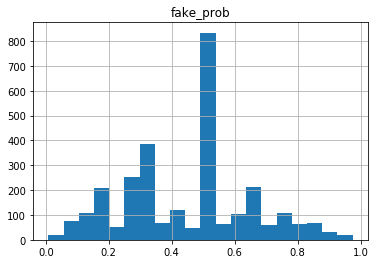

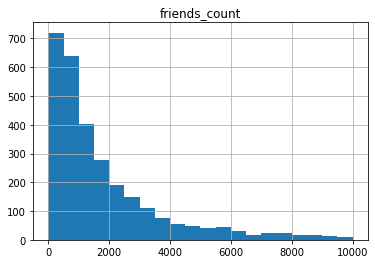

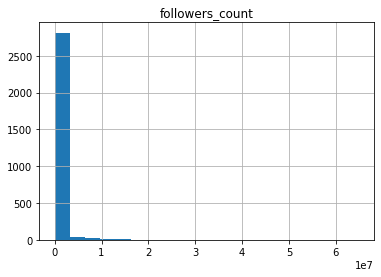

In [52]:
# df_feat.hist(column='fake_prob', bins=20)


df_final.hist(column='fake_prob', bins=20)

df_final.hist(column='friends_count', bins=20)

df_final.hist(column='followers_count', bins=20)

plt.show()

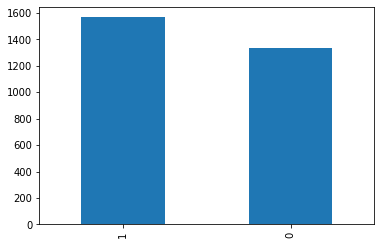

In [53]:
df_final["fake"].value_counts().plot.bar()
plt.show()

In [54]:
df_final["fake"].value_counts()

1    1566
0    1337
Name: fake, dtype: int64

In [55]:
dat = pd.read_csv("datasets/verified.dat", 
                 names=["uid", "name", "friends", "friends_count", 
                        "followers_count", "listed_count", "statuses_count", 
                        "created_at", "url", "avatar", "location"])

In [56]:
# filtered = df[df['uid'].isin(list(df_final['uid']))]
filtered = dat[dat['uid'].isin(list(df_final['uid']))]

In [57]:
filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2903 entries, 13 to 334103
Data columns (total 11 columns):
uid                2903 non-null int64
name               2903 non-null object
friends            2903 non-null object
friends_count      2903 non-null int64
followers_count    2903 non-null int64
listed_count       2903 non-null int64
statuses_count     2903 non-null int64
created_at         2903 non-null object
url                2663 non-null object
avatar             2872 non-null object
location           2641 non-null object
dtypes: int64(5), object(6)
memory usage: 272.2+ KB


In [61]:
filtered.to_csv('datasets/verified_3k.dat', header=False, index = False)